In [1]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [31]:
import pandas as pd
import numpy as np

In [32]:
# reading the CSV file into pandas dataframe
class_data = pd.read_csv("Iris.csv") 

In [33]:
class_data.take(np.random.permutation(len(class_data))[:10])

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
86,87,6.7,3.1,4.7,1.5,Iris-versicolor
80,81,5.5,2.4,3.8,1.1,Iris-versicolor
139,140,6.9,3.1,5.4,2.1,Iris-virginica
36,37,5.5,3.5,1.3,0.2,Iris-setosa
79,80,5.7,2.6,3.5,1.0,Iris-versicolor
120,121,6.9,3.2,5.7,2.3,Iris-virginica
45,46,4.8,3.0,1.4,0.3,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa
50,51,7.0,3.2,4.7,1.4,Iris-versicolor
71,72,6.1,2.8,4.0,1.3,Iris-versicolor


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [34]:
class_data.isna()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


# There are No Missing Values in the dataset

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [35]:
class_data['Species']=pd.Categorical(class_data['Species']).codes
class_data['Species']

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    2
121    2
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int8

In [36]:
class_data['Species'].shape

(150,)

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [37]:
class_data.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species             int8
dtype: object

In [38]:
class_data.drop("Id",axis=1,inplace=True)

In [39]:
class_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [41]:
class_data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


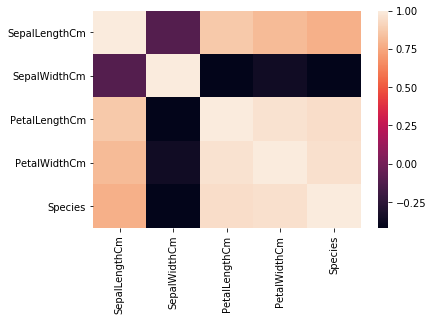

In [76]:
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
import matplotlib.pyplot as plt 
%matplotlib inline

sns.heatmap(class_data.corr())

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [43]:
class_data.var()

SepalLengthCm    0.685694
SepalWidthCm     0.188004
PetalLengthCm    3.113179
PetalWidthCm     0.582414
Species          0.671141
dtype: float64

In [44]:
class_data.cov()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,0.685694,-0.039268,1.273682,0.516904,0.530872
SepalWidthCm,-0.039268,0.188004,-0.321713,-0.117981,-0.148993
PetalLengthCm,1.273682,-0.321713,3.113179,1.296387,1.371812
PetalWidthCm,0.516904,-0.117981,1.296387,0.582414,0.597987
Species,0.530872,-0.148993,1.371812,0.597987,0.671141


## Question 6

*Plot the scatter matrix for all the variables.*

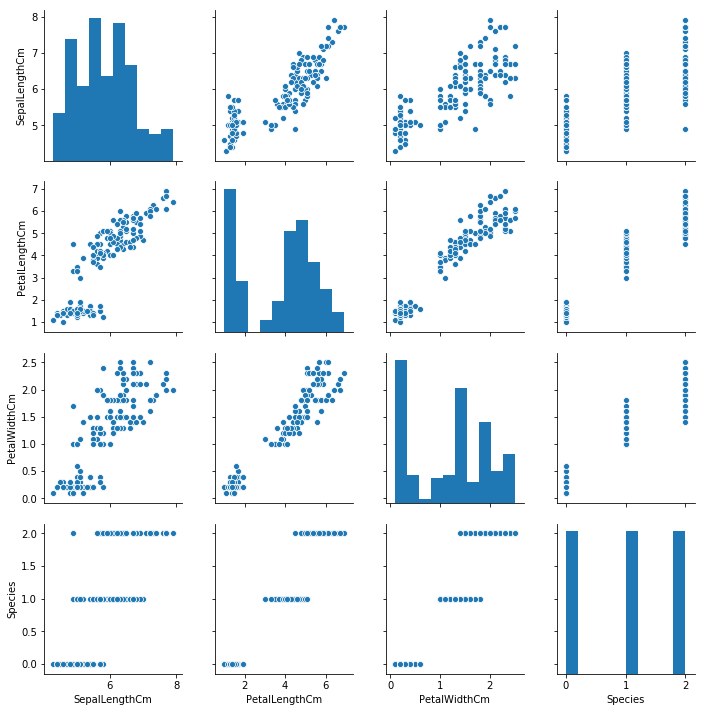

In [18]:
sns.pairplot(class_data)

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [46]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc, roc_curve

In [47]:
X = class_data.drop("Species", axis=1)
y = class_data["Species"]

In [48]:
test_size = 0.20 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [120]:
def ModelPerformanceAnalysis(model, X, y):
    model.fit(X_train, y_train)
    # Train accuracy numbers
    trainPreds = model.predict(X_train)
    trainAccuracy = accuracy_score(y_train, trainPreds)
    #trainResults=[X_train.shape[0], trainAccuracy]
    trainRecall = recall_score(y_train, trainPreds, average="weighted")
    trainPrecision = precision_score(y_train, trainPreds, average="weighted")
    trainF1score = f1_score(y_train, trainPreds , average="weighted")
    trainResults=[X_train.shape[0], trainAccuracy, trainRecall, trainPrecision, trainF1score]
    
    # Test accuracy numbers
    testPreds = model.predict(X_test)
    testAccuracy = accuracy_score(y_test, testPreds)
    #testResults=[X_test.shape[0], testAccuracy]
    #resultsDf = pd.DataFrame( index=["dataSize", "accuracy"])
    testRecall = recall_score(y_test, testPreds, average="weighted")
    testPrecision = precision_score(y_test, testPreds, average="weighted")
    testF1score = f1_score(y_test, testPreds, average="weighted")
    testResults=[X_test.shape[0], testAccuracy, testRecall, testPrecision, testF1score]
    resultsDf = pd.DataFrame( index=["dataSize", "accuracy", "recall", "precision", "f1_score"])

    resultsDf['unOptimalTrainResults'] = trainResults
    resultsDf['unOptimalTestResults'] = testResults
    
    return resultsDf.round(2)

In [121]:
ModelPerformanceAnalysis(KNeighborsClassifier(), X, y)

,unOptimalTrainResults,unOptimalTestResults
dataSize,120.00,30.00
accuracy,0.97,0.93
recall,0.97,0.93
precision,0.97,0.93
f1_score,0.97,0.93


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

In [122]:
rangeN = [1,3,5,7,9,11,13,15,17,19]
rangeN

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [123]:
from sklearn.model_selection import cross_val_score

list_scores=[]

In [124]:
for k in rangeN:
    knn = KNeighborsClassifier(n_neighbors= k)
    scores = cross_val_score(knn,X_train, y_train, cv=10, scoring = 'accuracy')
    list_scores.append(scores.mean())

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [125]:
MSE = [1 - x for x in list_scores]

In [126]:
rangeN[MSE.index(min(MSE))]

9

In [127]:
for i in rangeN:
    print(i)
    print(ModelPerformanceAnalysis(KNeighborsClassifier(n_neighbors=i), X, y))

1
           unOptimalTrainResults  unOptimalTestResults
dataSize                   120.0                  30.0
accuracy                     1.0                   0.9
recall                       1.0                   0.9
precision                    1.0                   0.9
f1_score                     1.0                   0.9
3
           unOptimalTrainResults  unOptimalTestResults
dataSize                  120.00                 30.00
accuracy                    0.96                  0.93
recall                      0.96                  0.93
precision                   0.96                  0.93
f1_score                    0.96                  0.93
5
           unOptimalTrainResults  unOptimalTestResults
dataSize                  120.00                 30.00
accuracy                    0.97                  0.93
recall                      0.97                  0.93
precision                   0.97                  0.93
f1_score                    0.97                  0.93
7
  

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

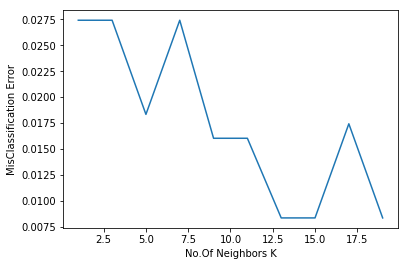

In [77]:
plt.plot(rangeN,MSE)
plt.xlabel('No.Of Neighbors K')
plt.ylabel('MisClassification Error')
plt.show()

# Naive Bayes with Iris Data

In [75]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [73]:
X = class_data.drop("Species", axis=1)
y = class_data["Species"]

In [74]:
#Check the dataset
print(y)
print(X)

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    2
121    2
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int8
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
5              5.4           3.9       

# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

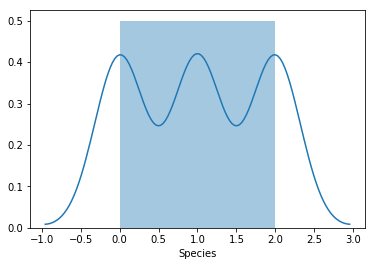

In [78]:
sns.distplot(class_data.Species)

### Question 12 
Find Correlation among all variables and give your insights 

In [ ]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [82]:
class_data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


### Split data in Training and test set in 80:20.

### Question 13 
Do Feature Scaling 

In [ ]:
# Use StandardScaler or similar methods

In [103]:
X = X.apply(zscore)

### Question 14 
Train and Fit NaiveBayes Model

In [110]:
from sklearn.naive_bayes import GaussianNB
test_size = 0.20 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

model = GaussianNB()

#Fit the model
model.fit(X_train, y_train)
print(model)


GaussianNB(priors=None, var_smoothing=1e-09)


In [111]:
#Predict
predicted = model.predict(X_test)

### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [112]:
metrics.confusion_matrix(y_test,predicted)

array([[ 9,  0,  0],
       [ 0, 11,  1],
       [ 0,  1,  8]], dtype=int64)

In [113]:
model_score = model.score(X_test, y_test)
model_score

0.9333333333333333

In [119]:
f1_score(y_test, predicted, average="weighted")

0.9333333333333333

# The model gives ~93% accuracy for classifying the Species correctly.